Plotting Things in Narrative Time

In [112]:
import pandas as pd
import nltk
from collections import Counter

In [113]:
moonstone = open('../Readings/Content/texts/moonstone.md', encoding="utf8").read()

In [114]:
moonstoneTokens = nltk.word_tokenize(moonstone.lower())

In [115]:
moonstoneTokens.index('herncastle')

103

In [116]:
moonstoneTokensEnumerated = enumerate(moonstoneTokens)

In [117]:
for i, token in enumerate(moonstoneTokens):
    if token == 'herncastle':
        print(token, ': ', str(i))

herncastle :  103
herncastle :  1160
herncastle :  1316
herncastle :  1410
herncastle :  1692
herncastle :  1759
herncastle :  1963
herncastle :  2051
herncastle :  2166
herncastle :  2478
herncastle :  2988
herncastle :  14201
herncastle :  14448
herncastle :  15870
herncastle :  17223
herncastle :  21123
herncastle :  37301
herncastle :  92502
herncastle :  130620
herncastle :  132168
herncastle :  139349
herncastle :  141568
herncastle :  141909
herncastle :  142119
herncastle :  142463
herncastle :  143574
herncastle :  143972


In [118]:
herncastleLocations = [i for i, token in enumerate(moonstoneTokens) if token == 'herncastle']

## Binning

Given a list of something, we want to make a histogram, where we count the number of things in each category

Ex: Ages: 14, 14, 14, 15, 18, 30, 45, 60, 75, 100

0-12, 12-18, 19-30, 31-50 

In [119]:
categories, bins = pd.cut(range(len(moonstoneTokens)), bins=10, retbins=True)

In [120]:
bins

array([  -233.922,  23392.2  ,  46784.4  ,  70176.6  ,  93568.8  ,
       116961.   , 140353.2  , 163745.4  , 187137.6  , 210529.8  ,
       233922.   ])

In [121]:
pd.cut(herncastleLocations, bins)

[(-233.922, 23392.2], (-233.922, 23392.2], (-233.922, 23392.2], (-233.922, 23392.2], (-233.922, 23392.2], ..., (140353.2, 163745.4], (140353.2, 163745.4], (140353.2, 163745.4], (140353.2, 163745.4], (140353.2, 163745.4]]
Length: 27
Categories (10, interval[float64]): [(-233.922, 23392.2] < (23392.2, 46784.4] < (46784.4, 70176.6] < (70176.6, 93568.8] ... (140353.2, 163745.4] < (163745.4, 187137.6] < (187137.6, 210529.8] < (210529.8, 233922.0]]

In [122]:
herncastleBinned = pd.cut(herncastleLocations, bins).value_counts()

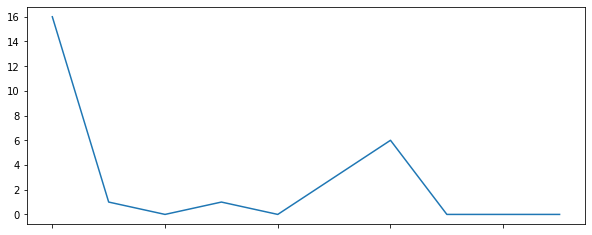

In [123]:
herncastleBinned.plot(figsize=(10,4))

In [124]:
def binTokens(word, nBins=10):
    indices = [i for i, token in enumerate(moonstoneTokens) if token == word]
    categories, bins = pd.cut(range(len(moonstoneTokens)), bins=nBins, retbins=True)
    return pd.cut(indices, bins).value_counts()

In [125]:
pd.DataFrame({ "herncastle": binTokens("herncastle"), "diamond": binTokens("diamond")})

herncastle  diamond
(-233.922, 23392.2]           16       65
(23392.2, 46784.4]             1       53
(46784.4, 70176.6]             0       21
(70176.6, 93568.8]             1       24
(93568.8, 116961.0]            0       12
(116961.0, 140353.2]           3        5
(140353.2, 163745.4]           6       32
(163745.4, 187137.6]           0       31
(187137.6, 210529.8]           0       29
(210529.8, 233922.0]           0       43

In [126]:
def plotNarrativeTime(words):
    wordsAndLocations = { word: binTokens(word) for word in words}
    return pd.DataFrame(wordsAndLocations).plot()

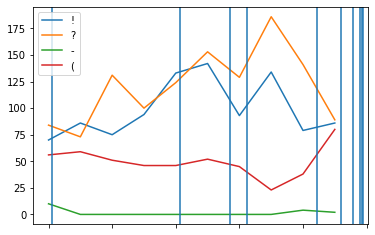

In [134]:
plotAxis = plotNarrativeTime(['!', '?','-','('])

moonstoneNoTOC = moonstone[280:]

for marker in ["First Period", "First Narrative", "Second Narrative", "Third Narrative",
               "Fourth Narrative", "Fifth Narrative", "Sixth Narrative", "Seventh Narrative",
              "Eighth Narrative", "Epilogue"]:
    markerIndex = moonstoneNoTOC.index(marker)
    plotAxis.axvline((markerIndex / len(moonstone) * 10))

In [133]:
print(moonstone[:280])

---
title: "The Moonstone"
author: Wilkie Collins
editor: Jonathan Reeve
rights: Public Domain
source: Project Gutenberg
publication-date: 2019
toc:
- Prologue
- Chapter X
- Chapter XV
- Second Period
- Second Narrative
- Third Narrative
- Fourth Narrative
- Sixth Narrative
---




# N-grams

N-grams are just collections of N- numbers of words.

1. unigrams
2. bigrams
3. trigrams



In [63]:
tokens = ["The", "quick", "brown", "fox", "jumped"]
bigrams = [("The", "quick"), ("quick", "brown")] #etc

In [64]:
list(zip(tokens, tokens[1:]))

[('The', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumped')]

In [66]:
list(nltk.ngrams(tokens, 3))

[('The', 'quick', 'brown'),
 ('quick', 'brown', 'fox'),
 ('brown', 'fox', 'jumped')]

In [70]:
moonstoneTrigrams = nltk.ngrams(moonstoneTokens, 3)

In [72]:
list(moonstoneTrigrams)[200:250]

[('under', 'general', 'baird'),
 ('general', 'baird', ','),
 ('baird', ',', 'on'),
 (',', 'on', 'the'),
 ('on', 'the', '4th'),
 ('the', '4th', 'of'),
 ('4th', 'of', 'may'),
 ('of', 'may', ','),
 ('may', ',', '1799.'),
 (',', '1799.', 'in'),
 ('1799.', 'in', 'order'),
 ('in', 'order', 'that'),
 ('order', 'that', 'the'),
 ('that', 'the', 'circumstances'),
 ('the', 'circumstances', 'may'),
 ('circumstances', 'may', 'be'),
 ('may', 'be', 'clearly'),
 ('be', 'clearly', 'understood'),
 ('clearly', 'understood', ','),
 ('understood', ',', 'i'),
 (',', 'i', 'must'),
 ('i', 'must', 'revert'),
 ('must', 'revert', 'for'),
 ('revert', 'for', 'a'),
 ('for', 'a', 'moment'),
 ('a', 'moment', 'to'),
 ('moment', 'to', 'the'),
 ('to', 'the', 'period'),
 ('the', 'period', 'before'),
 ('period', 'before', 'the'),
 ('before', 'the', 'assault'),
 ('the', 'assault', ','),
 ('assault', ',', 'and'),
 (',', 'and', 'to'),
 ('and', 'to', 'the'),
 ('to', 'the', 'stories'),
 ('the', 'stories', 'current'),
 ('storie

In [81]:
moonstoneTokensAlpha = [token for token in moonstoneTokens if token.isalpha()]

In [135]:
moonstoneTrigrams = nltk.ngrams(moonstoneTokensAlpha, 3)

In [136]:
moonstoneTrigramsList = list(moonstoneTrigrams)

In [137]:
Counter(moonstoneTrigramsList).most_common(20)

[(('i', 'don', 't'), 91),
 (('in', 'the', 'house'), 80),
 (('one', 'of', 'the'), 76),
 (('out', 'of', 'the'), 75),
 (('i', 'can', 't'), 62),
 (('of', 'the', 'moonstone'), 59),
 (('of', 'the', 'diamond'), 54),
 (('which', 'i', 'had'), 53),
 (('that', 'i', 'had'), 51),
 (('that', 'he', 'had'), 50),
 (('lady', 'verinder', 's'), 49),
 (('miss', 'verinder', 's'), 49),
 (('miss', 'rachel', 's'), 47),
 (('the', 'subject', 'of'), 47),
 (('my', 'lady', 's'), 46),
 (('the', 'end', 'of'), 43),
 (('the', 'rest', 'of'), 43),
 (('that', 'he', 'was'), 43),
 (('if', 'i', 'had'), 42),
 (('the', 'time', 'when'), 42)]

In [138]:
def commonNgrams(tokens, n):
    ngrams = nltk.ngrams(moonstoneTokensAlpha, n)
    ngramsList = list(ngrams)
    return Counter(ngramsList).most_common(20)
    
    

In [139]:
commonNgrams(moonstoneTokensAlpha, 8)

[(('on', 'the', 'road', 'to', 'this', 'house', 'and', 'on'), 3),
 (('the', 'road', 'to', 'this', 'house', 'and', 'on', 'no'), 3),
 (('road', 'to', 'this', 'house', 'and', 'on', 'no', 'other'), 3),
 (('to', 'this', 'house', 'and', 'on', 'no', 'other', 'that'), 3),
 (('this', 'house', 'and', 'on', 'no', 'other', 'that', 'the'), 3),
 (('house', 'and', 'on', 'no', 'other', 'that', 'the', 'english'), 3),
 (('and', 'on', 'no', 'other', 'that', 'the', 'english', 'gentleman'), 3),
 (('on', 'no', 'other', 'that', 'the', 'english', 'gentleman', 'will'), 3),
 (('no', 'other', 'that', 'the', 'english', 'gentleman', 'will', 'travel'), 3),
 (('has', 'the', 'english', 'gentleman', 'got', 'it', 'about', 'him'), 3),
 (('the', 'time', 'of', 'which', 'i', 'am', 'now', 'writing'), 3),
 (('i', 'have', 'got', 'something', 'to', 'say', 'to', 'you'), 3),
 (('an', 'obstacle', 'in', 'the', 'way', 'of', 'my', 'recovering'), 3),
 (('the', 'folly', 'of', 'beginning', 'a', 'work', 'before', 'we'), 2),
 (('folly', '

# Finding Multiple Tokens in Narrative Time

In [105]:
def binTokens(twoWords, nBins=10):
    firstWord, secondWord = twoWords
    indices = []
    print(firstWord)
    print(secondWord)
    
    for i, token in enumerate(moonstoneTokens):
        if token == firstWord:

            
            nextToken = moonstoneTokens[i + 1]

            if nextToken == secondWord:
      
    
                indices.append(i)
            
    categories, bins = pd.cut(range(len(moonstoneTokens)), bins=nBins, retbins=True)
    return pd.cut(indices, bins).value_counts()

In [110]:
binTokens(['my', 'moonstone'])

my
moonstone


(-233.922, 23392.2]     0
(23392.2, 46784.4]      0
(46784.4, 70176.6]      0
(70176.6, 93568.8]      0
(93568.8, 116961.0]     0
(116961.0, 140353.2]    0
(140353.2, 163745.4]    0
(163745.4, 187137.6]    0
(187137.6, 210529.8]    0
(210529.8, 233922.0]    0
dtype: int64